In [1]:
import pandas as pd
from Bio import pairwise2
from Bio.Align import substitution_matrices
import numpy as np
names = substitution_matrices.load()
from sklearn.cluster import SpectralClustering

/home/bionets-og86asub/miniforge3/envs/bayer-hack/lib/python3.11/site-packages/Bio/pairwise2.py:278: BiopythonDeprecationWarning: Bio.pairwise2 has been deprecated, and we intend to remove it in a future release of Biopython. As an alternative, please consider using Bio.Align.PairwiseAligner as a replacement, and contact the Biopython developers if you still need the Bio.pairwise2 module.
  warnings.warn(


In [2]:
names = substitution_matrices.load()
names

['BENNER22',
 'BENNER6',
 'BENNER74',
 'BLASTN',
 'BLASTP',
 'BLOSUM45',
 'BLOSUM50',
 'BLOSUM62',
 'BLOSUM80',
 'BLOSUM90',
 'DAYHOFF',
 'FENG',
 'GENETIC',
 'GONNET1992',
 'HOXD70',
 'JOHNSON',
 'JONES',
 'LEVIN',
 'MCLACHLAN',
 'MDM78',
 'MEGABLAST',
 'NUC.4.4',
 'PAM250',
 'PAM30',
 'PAM70',
 'RAO',
 'RISLER',
 'SCHNEIDER',
 'STR',
 'TRANS']

## Read fasta sequences

In [3]:
def read_fasta(fp):
        name, seq = None, []
        for line in fp:
            line = line.rstrip()
            if line.startswith(">"):
                if name: yield (name, ''.join(seq))
                name, seq = line, []
            else:
                seq.append(line)
        if name: yield (name, ''.join(seq))



## Code to compute the pairwise similarity of all sequences in the data base

In [4]:

# Function to compute pairwise alignments using BLOSUM62
def compute_pairwise_alignments(data, blosum):
    nseq = len(data)
    scores = np.zeros((nseq, nseq))
    alignments = []
    for i in range(len(data)):
        if i % 10 == 0:
            print(i)
        for j in range(i, len(data)):
            
            seq1 = data[i][1]  # Sequence 1
            seq2 = data[j][1]
            alignment = pairwise2.align.globaldx(seq1, seq2, blosum, score_only = True)  # gap open = -10, gap extend = -0.5
            scores[i,j] =  alignment
    return scores# Extract rows, columns, and values from the data

In [5]:
def compute_and_save(data, blosum, output)
    # Compute alignments
    alignments = compute_pairwise_alignments(data, blosum)
    i_lower = np.tril_indices(alignments.shape[0], -1)
    alignments[i_lower] = alignments.T[i_lower]
    scores = pd.DataFrame(alignments)
    scores.to_csv(output, sep='\t')

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560


In [6]:
# Load the BLOSUM62 substitution matrix
blosum62 = substitution_matrices.load("BLOSUM62")
blosum90 = substitution_matrices.load("BLOSUM90")

data = []
with open('/home/bionets-og86asub/Documents/hackathon-bayer/TEMPRO/embedding_generator/sdabs.fasta') as fp:
    for name, seq in read_fasta(fp):
        data.append((name, seq))
        
compute_and_save(data, blosum90, '../data/alignment_scores_blosum90.tsv')

## Augment the original metadata with the homology clusters

In [9]:
## Cluster the distance matrix using SpectralClustering = Graph cut
orig = pd.read_excel('../data/sdab_data.xlsx')
for i in range(2, 10):
    sp = SpectralClustering(affinity='precomputed', n_clusters=i).fit(alignments)
    orig[f'split_{i}'] = sp.labels_

## Append new columsn to the metadat and save
names = [f'split_{i}' for i in range(2,10)]
meta = orig.loc[:, ['name','source', 'tm']+names]
meta.to_csv('../data/augmented_metadata.tsv')

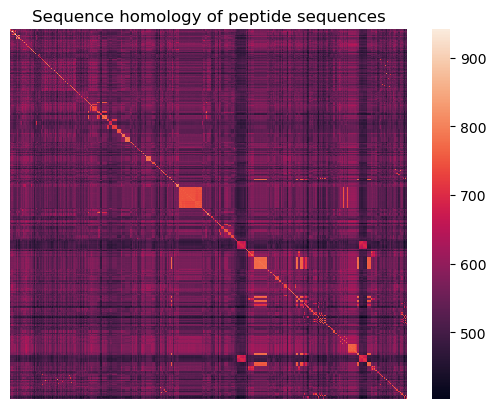

In [12]:

import matplotlib.pylab as plt
import seaborn as sns

ax = sns.heatmap(scores)
ax.set_title('Sequence homology of peptide sequences')
x_axis = ax.axes.get_xaxis()
x_axis.set_visible(False)
y_axis = ax.axes.get_yaxis()
y_axis.set_visible(False)
plt.show()